<a href="https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/intro_switching_backends.ipynb" 
   target="_parent">
   <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Discovering & switching backends

EasyAgents does not implement algorithms like Ppo or Dqn by itself. Instead it relies on existig 
implementations and offers an 'easy' access offering the same api across all implementations. 
We call these implementations a 'backend'. So far we did not choose a backend explicitely, 
thus a 'default' algorithm implementation was chosen automatically. 
We can readily discover the available backends like this: 


#### Install packages (gym, tfagents, tensorflow,....)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import warnings

warnings.filterwarnings('ignore')
if 'google.colab' in sys.modules:
    !apt-get update >/dev/null
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start() 
else:
    #  for local installation
    sys.path.append('..')

#### install easyagents

In [ ]:
if 'google.colab' in sys.modules:
    !pip install -q easyagents >/dev/null

## Discovering & switching backends

In [1]:
import easyagents

easyagents.agents.get_backends()

['default', 'tfagents']

Currently the default implementation of PpoAgent uses 'tfagents'. 

Due to an incompatibility between tf-agents and tensorforce, agents from both libraries can not coexist
in the same python instance. In order to use tensorforce it must therefore first be activated:

In [2]:
easyagents.agents.activate_tensorforce()

To enforce the new backend add the `backend='tensorforce'` argument
to the agent constructor: 

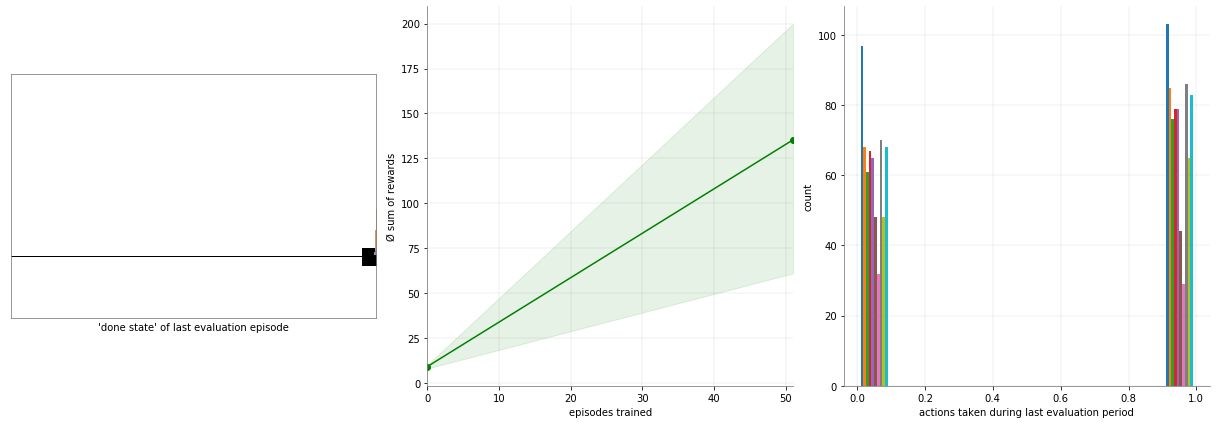

In [3]:
from easyagents.agents import PpoAgent
from easyagents.callbacks import plot

ppoAgent = PpoAgent( 'CartPole-v0', backend='tensorforce')
ppoAgent.train([plot.State(), plot.Rewards(),plot.Actions()], num_iterations = 5 )

Note that once tensorforce is activated tf-agents is not available anymore. Hence

In [4]:
easyagents.agents.activate_tensorforce()

does not include the 'tfagents' backend. 

There are differences between the implementations. 
Thus you may (and probably will) get different results, depending on your particular backend choice. 
The current 'tensorforce' backend implementation does not provide the losss, thus we do not display 
the loss plot.


## Next: logging, seeding & plot clearing

* see 
  [on colab](https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/intro_logging.ipynb):
  how an agent interacts with unerlying library's api & how it operates on the gym environment; 
  how to set seeds; how to control jupyter output cell clearing